# **Library**


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
players = pd.read_csv("WorldCupPlayers.csv")
matches = pd.read_csv("WorldCupMatches.csv")
world_cups = pd.read_csv("WorldCups.csv")

# **Cleaning**

## Cleaning the Cups file

In [ ]:
world_cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [ ]:
for i in world_cups.columns:
    print(i,":",world_cups[i].dtype)

Year : int64
Country : object
Winner : object
Runners-Up : object
Third : object
Fourth : object
GoalsScored : int64
QualifiedTeams : int64
MatchesPlayed : int64
Attendance : object


In [ ]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.', '')

world_cups['Attendance'] = pd.to_numeric(world_cups['Attendance'] , errors='coerce')

In [ ]:
world_cups['Attendance']

,Attendance
0,590549
1,363000
2,375700
3,1045246
4,768607
5,819810
6,893172
7,1563135
8,1603975
9,1865753


## Cleaning the Players file

In [ ]:
players.head(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
players["Shirt Number"].value_counts()

,count
Shirt Number,
0,3069
1,1559
10,1554
15,1554
19,1554
14,1554
16,1554
11,1554
9,1554


In [ ]:
players.drop("Position" , axis=1 , inplace=True)
players.drop("Event" , axis=1 , inplace=True)
players.drop("Shirt Number" , axis=1 , inplace=True)

In [ ]:
players.head(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,Alex THEPOT
1,201,1096,MEX,LUQUE Juan (MEX),S,Oscar BONFIGLIO
2,201,1096,FRA,CAUDRON Raoul (FRA),S,Marcel LANGILLER
3,201,1096,MEX,LUQUE Juan (MEX),S,Juan CARRENO
4,201,1096,FRA,CAUDRON Raoul (FRA),S,Ernest LIBERATI


## Cleaning the Matches file

In [ ]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matches.dropna(subset=["Year"], inplace=True)

In [ ]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
matches.duplicated().sum()

16

In [ ]:
matches=matches.drop_duplicates()

In [ ]:
matches.duplicated().sum()

0

In [ ]:
matches.reset_index(drop=True, inplace=True)

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           8

In [ ]:
matches[matches["Attendance"].isnull()==True]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


In [ ]:
matches.loc[matches["Attendance"].isnull(), "Attendance"] = float(int(matches["Attendance"].mean()))

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            836 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           8

Modify Wrong Names

In [ ]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,
"rn"">Republic of Ireland",5
"rn"">United Arab Emirates",1
"rn"">Trinidad and Tobago",1
"rn"">Serbia and Montenegro",1
"rn"">Bosnia and Herzegovina",1


In [ ]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [ ]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [ ]:
wrong = wrong + old_name
correct = correct + new_name

In [ ]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">United Arab Emirates',
  'rn">Trinidad and Tobago',
  'rn">Serbia and Montenegro',
  'rn">Bosnia and Herzegovina',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'United Arab Emirates',
  'Trinidad and Tobago',
  'Serbia and Montenegro',
  'Bosnia and Herzegovina',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [ ]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [ ]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,


In [ ]:
names_1 = matches[matches['Away Team Name'].str.contains('rn">')]['Away Team Name'].value_counts()
names_1

,count
Away Team Name,


In [ ]:
new_matches = matches

In [ ]:
new_matches=new_matches.rename(columns={"Win conditions" : "The Winner Team"})

In [ ]:
new_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,The Winner Team,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
for i in new_matches.columns:
    print(i,":",new_matches[i].dtype)

Year : float64
Datetime : object
Stage : object
Stadium : object
City : object
Home Team Name : object
Home Team Goals : float64
Away Team Goals : float64
Away Team Name : object
The Winner Team : object
Attendance : float64
Half-time Home Goals : float64
Half-time Away Goals : float64
Referee : object
Assistant 1 : object
Assistant 2 : object
RoundID : float64
MatchID : float64
Home Team Initials : object
Away Team Initials : object


In [ ]:
for i in new_matches.index:
    new_matches.loc[i,"Normal Match"]=i

In [ ]:
for i in new_matches.index:
    if "w" not in new_matches.loc[i,"The Winner Team"]:
        new_matches.loc[i,"Normal Match"] = True
    else:
        new_matches.loc[i,"Normal Match"] = False

In [ ]:
new_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,The Winner Team,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Normal Match
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,True
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,True
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,True
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,True
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,True


In [ ]:
for i in new_matches.index:
    if new_matches.loc[i,"Home Team Goals"] > new_matches.loc[i,"Away Team Goals"]:
        new_matches.loc[i,"The Winner Team"] = new_matches.loc[i,"Home Team Name"]
    elif new_matches.loc[i,"Home Team Goals"] < new_matches.loc[i,"Away Team Goals"]:
        new_matches.loc[i,"The Winner Team"] = new_matches.loc[i,"Away Team Name"]
    elif new_matches.loc[i,"Home Team Goals"] == new_matches.loc[i,"Away Team Goals"] and new_matches.loc[i,"Normal Match"] == True:
        new_matches.loc[i,"The Winner Team"] = "Draw"
    else:
        new_matches.loc[i,"The Winner Team"] = new_matches.loc[i,"The Winner Team"].split("win")[0].strip()

In [ ]:
new_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,The Winner Team,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Normal Match
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,France,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,True
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,USA,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,True
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,Yugoslavia,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,True
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,Romania,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,True
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,Argentina,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,True


# **Analysis**

In [ ]:
Players = players
Cups = world_cups
Match = new_matches

## Players

In [ ]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Player Name    37784 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [ ]:
total_match_ids = Players.groupby('MatchID').count().shape[0]
total_RoundID= Players.groupby('RoundID').count().shape[0]
total_Team_Initials = Players.groupby('Team Initials').count().shape[0]

total_Players_Name= Players.groupby('Player Name').count().shape[0]
total_Coach_Name= Players.groupby('Coach Name').count().shape[0]

print(f"Num Matchs",total_match_ids)
print(f"Num Rounds",total_RoundID)
print(f"Num Teams",total_Team_Initials)
print(f"Num Players",total_Players_Name)
print(f"Num Coach",total_Coach_Name)



Num Matchs 836
Num Rounds 101
Num Teams 82
Num Players 7663
Num Coach 335




```
Positionas: 33641 null values
Event: 28715 null values

num of Matchs : 836
Num Rounds : 101
num of Teams : 82
num of players : 7663
num of players : 335
```


## Matches

In [ ]:
Match

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,The Winner Team,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Normal Match
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,France,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,True
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,USA,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,True
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,Yugoslavia,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,True
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,Romania,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,True
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,Argentina,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,Argentina,...,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL,True
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,Netherlands,...,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX,True
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica,...,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE,False
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina,...,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI,False


In [ ]:
Match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   The Winner Team       836 non-null    object 
 10  Attendance            836 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           8

In [ ]:
total_match_ids = Match.groupby('MatchID').count().shape[0]
total_match_ids

836

In [ ]:
num_draw = Match[Match['The Winner Team'] == 'Draw'].shape[0]
num_draw

160

In [ ]:
most_team_win = Match[Match['The Winner Team'] != 'Draw']['The Winner Team'].value_counts().idxmax()
most_team_win

'Brazil'

In [ ]:
def Check_loser(row):
    if row['The Winner Team'] == row['Home Team Name']:
        return row['Away Team Name']
    elif row['The Winner Team'] == row['Away Team Name']:
        return row['Home Team Name']
    else:
        return 'Draw'

Match['Loser'] = Match.apply(Check_loser, axis=1)

In [ ]:
most_team_loss = Match[Match['Loser'] != 'Draw']['Loser'].value_counts().idxmax()
most_team_loss

'Mexico'

In [ ]:
the_most_Referee = Match['Referee'].value_counts().idxmax()
the_most_Assistant_1 = Match['Assistant 1'].value_counts().idxmax()
the_most_Assistant_2 = Match['Assistant 2'].value_counts().idxmax()

the_most_stadium = Match['Stadium'].value_counts().idxmax()
the_most_city = Match['City'].value_counts().idxmax()

Avg_Attendance = Match['Attendance'].mean()


print(f"The most Referee : {the_most_Referee}")
print(f"The most Assistant 1 : {the_most_Assistant_1}")
print(f"The most Assistant 2 : {the_most_Assistant_2}")

print(f"The most Stadium : {the_most_stadium}")
print(f"The most City : {the_most_city}")

print(  f"Avg Attendance : {Avg_Attendance}")

The most Referee : Ravshan IRMATOV (UZB)
The most Assistant 1 : GONZALEZ ARCHUNDIA Alfonso (MEX)
The most Assistant 2 : KOCHKAROV Bakhadyr (KGZ)
The most Stadium : Estadio Azteca
The most City : Mexico City 
Avg Attendance : 44859.45693779904



```
Number of non null Matchs in Data : 836

Num Matchs is Draw : 190
Num Matchs is not Draw : 662


The most Team win : Brazil
The most Team lose : Mexico


The most Stadium : Estadio Azteca
The most City : Mexico City

The most Referee : Ravshan IRMATOV (UZB)
The most Assistant 1 : ACHIK Redouane (MAR)
The most Assistant 2 : KOCHKAROV Bakhadyr (KGZ)

Avg Attendance : 45164.8

```



## Cups

In [ ]:
Cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
the_most_Win = Cups['Winner'].value_counts().idxmax()
the_most_Win

'Brazil'

In [ ]:
the_highest_GoalsScored_Cup = Cups['Country'][Cups['GoalsScored'].idxmax()]

the_highest_GoalsScored_Cup

'France'

In [ ]:
the_highest_QualifiedTeams =  Cups['Country'][Cups['QualifiedTeams'].idxmax()]

the_highest_QualifiedTeams

'France'

In [ ]:
the_highest_Attendance = Cups['Country'][Cups['Attendance'].idxmax()]

the_highest_Attendance

'USA'

In [ ]:
the_Avg_Attendance =Cups['Attendance'].mean()

the_Avg_Attendance

1872882.35

# **Visualization**

In [ ]:
players=Players
world_cups=Cups
matches=Match

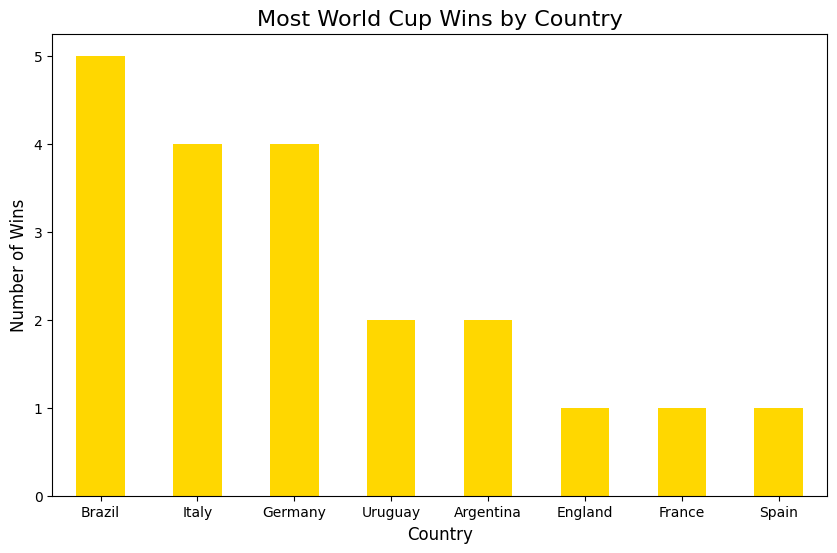

In [ ]:
the_most_Win = world_cups['Winner'].value_counts()
plt.figure(figsize=(10, 6))

the_most_Win.plot(kind='bar',color='gold')



plt.title('Most World Cup Wins by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=0)


plt.show()

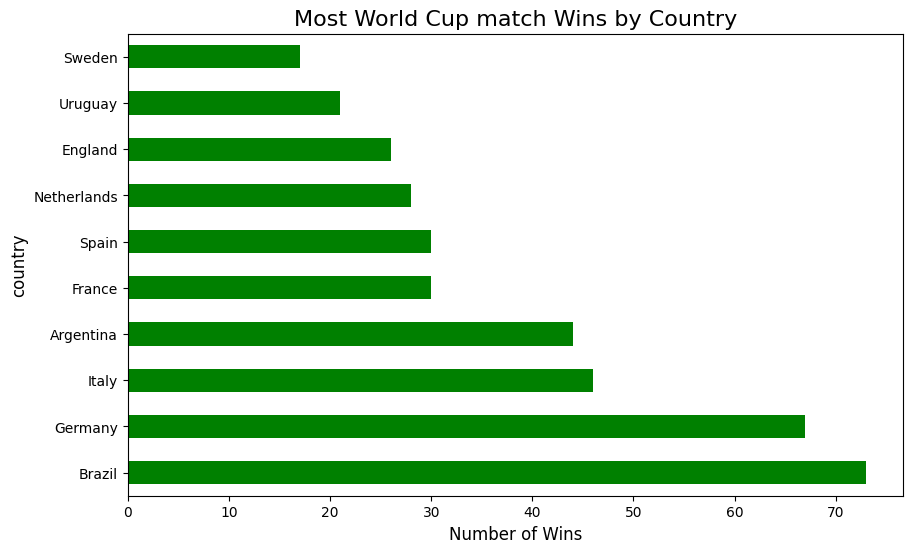

In [ ]:

most_team_win = matches[matches['The Winner Team'] != 'Draw']['The Winner Team'].value_counts().head(10)
the_most_Win = the_most_Win.sort_values(ascending=False)

plt.figure(figsize=(10, 6))

most_team_win.plot(kind='barh',color='green')



plt.title('Most World Cup match Wins by Country', fontsize=16)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('country', fontsize=12)



plt.show()

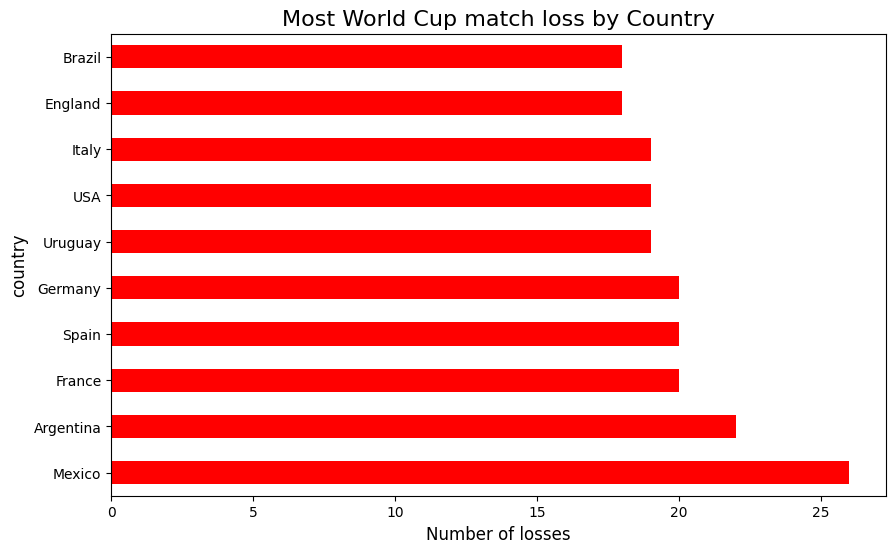

In [ ]:
matches['Loser'] = matches.apply(Check_loser, axis=1)

most_team_loss = matches[matches['Loser'] != 'Draw']['Loser'].value_counts().head(10)
plt.figure(figsize=(10, 6))

most_team_loss.plot(kind='barh',color='red')



plt.title('Most World Cup match loss by Country', fontsize=16)
plt.xlabel('Number of losses', fontsize=12)
plt.ylabel('country', fontsize=12)
plt.xticks(rotation=0)


plt.show()

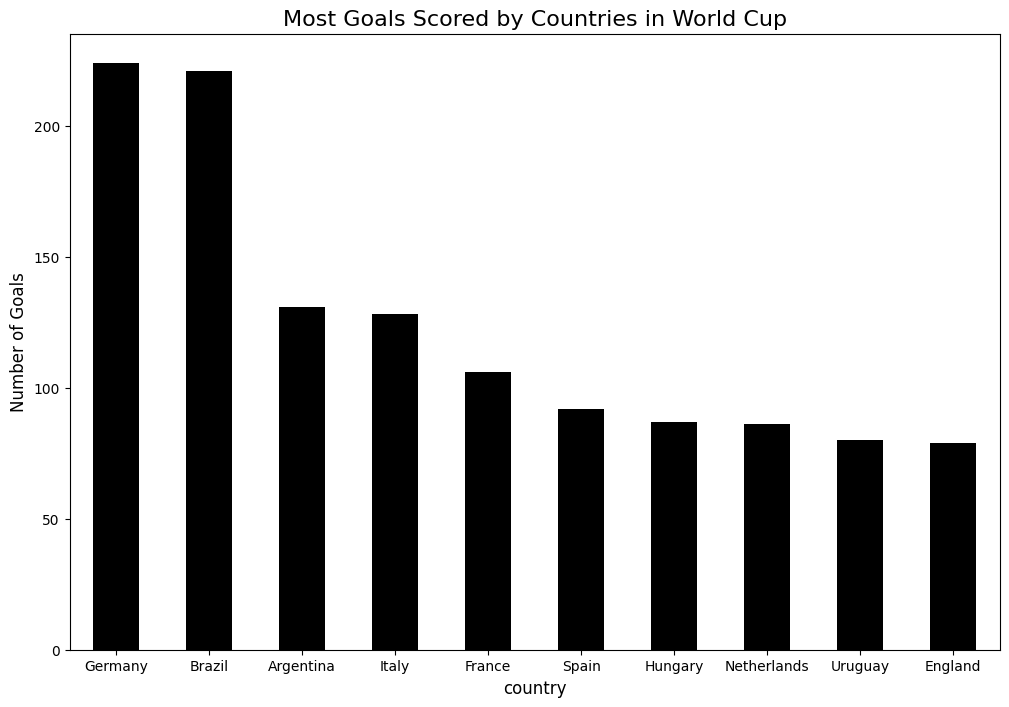

In [ ]:
home_goals = matches.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = matches.groupby('Away Team Name')['Away Team Goals'].sum()

total_goals = home_goals.add(away_goals, fill_value=0)

total_goals_sorted = total_goals.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))

total_goals_sorted.plot(kind='bar', color='black')


plt.title('Most Goals Scored by Countries in World Cup', fontsize=16)
plt.xlabel('country', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=0)

plt.show()

In [ ]:
import plotly.express as px
attendance_count = px.treemap(world_cups,
                 path=['Country', 'Year'],
                 values='Attendance',
                 color='Attendance',
                 color_continuous_scale='Viridis',
                 title="World Cup Attendance by Country and Year")


attendance_count.show()
